# Global Chinese Development Finance Dataset

Global China Data [AidData's Global Chinese Development Finance Dataset, Version 3.0](https://www.aiddata.org/data/aiddatas-global-chinese-development-finance-dataset-version-3-0)

In [1]:
import pandas as pd
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
import urllib.request

Load the data. This version doesn't have geospatial data included.

In [2]:
path = "../data/AidDatas_Global_Chinese_Development_Finance_Dataset_Version_3_0/AidDatasGlobalChineseDevelopmentFinanceDataset_v3.0.xlsx"
df = pd.read_excel(path, sheet_name="GCDF_3.0", index_col="AidData Record ID")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20985 entries, 94556 to 73615
Columns: 125 entries, Recommended For Aggregates to Loan Detail Score
dtypes: datetime64[ns](7), float64(24), int64(6), object(88)
memory usage: 20.2+ MB


# Geospatial analysis

Take a look at the geographical information

In [3]:
df[["Recipient", "Recipient Region", "Location Narrative", "Geographic Level of Precision Available",
    "ADM1 Level Available", "ADM2 Level Available", "Geospatial Feature Available"]].sample(10)

,Recipient,Recipient Region,Location Narrative,Geographic Level of Precision Available,ADM1 Level Available,ADM2 Level Available,Geospatial Feature Available
AidData Record ID,,,,,,,
86923,Gabon,Africa,This project was to aid in the construction of...,Within 5km,Yes,Yes,Yes
38023,Maldives,Asia,NaN,NaN,NaN,NaN,NaN
88271,Madagascar,Africa,This project was the donation of daily necessi...,Admin Level,Yes,Yes,Yes
36186,Cuba,America,NaN,NaN,NaN,NaN,NaN
72126,Cuba,America,This project supported Eastern Pharmaceutical ...,Precise,Yes,Yes,Yes
72231,Lesotho,Africa,The purpose of the project is to donate water ...,Precise,Yes,Yes,Yes
64244,Myanmar,Asia,NaN,NaN,NaN,NaN,NaN
72682,Pakistan,Asia,Islamabad,NaN,NaN,NaN,NaN
37666,Tanzania,Africa,Dar es Salaam,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Project count')

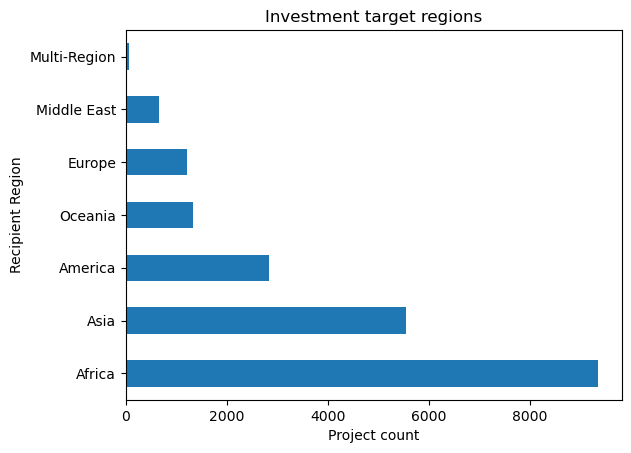

In [4]:
axes = df["Recipient Region"].value_counts().plot.barh(title="Investment target regions")
axes.set_xlabel("Project count")

Text(0.5, 0, 'Project count')

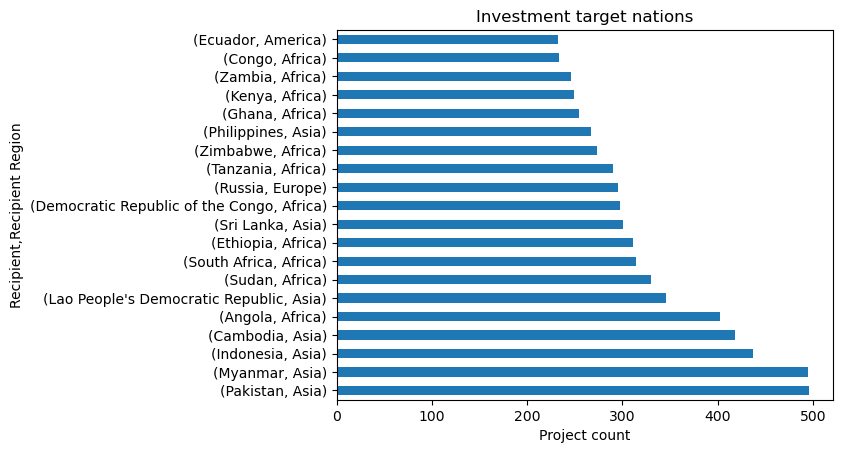

In [5]:
axes = df[["Recipient", "Recipient Region"]].value_counts().head(20).plot.barh(title="Investment target nations")
axes.set_xlabel("Project count")

Get shapefiles for country boundaries:

Natural Earth [1:110m Cultural Vectors](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/)

In [6]:
countries = gpd.read_file("../shapefiles/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 258 entries, 0 to 257
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int32(24), int64(1), object(137)
memory usage: 316.6+ KB


ERROR 1: PROJ: proj_create_from_database: Open of /home/joe/miniforge3/envs/pluralize/share/proj failed


In [7]:
gdf = gpd.GeoDataFrame(df["Recipient"].value_counts().drop("Multi-Region").to_frame().join(countries.set_index("ADMIN")["geometry"], how="outer"))
gdf["count"] =gdf["count"].fillna(0)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 281 entries, Afghanistan to eSwatini
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   count     281 non-null    float64 
 1   geometry  258 non-null    geometry
dtypes: float64(1), geometry(1)
memory usage: 6.6+ KB


Text(35.347222222222214, 0.5, 'Latitude')

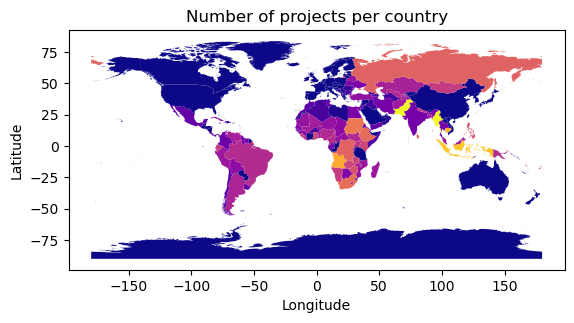

In [9]:
fig, ax = plt.subplots()
gdf.plot(column="count", cmap="plasma", ax=ax)
ax.set_title("Number of projects per country")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Geospatial Global Chinese Development Finance Dataset

[AidData's Geospatial Global Chinese Development Finance Dataset, Version 3.0](